In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import cmath
import warnings

from scipy import signal

In [17]:
class dft(object):
  def __init__(self, x, fs, K = None):
    self.x = x
    self.fs = fs
    self.N = len(x)
    if K == None:
      K = len(x)
    self.K = K
    self.f = np.arange(self.K)*self.fs/self.N
    self.f_c = np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K

  def solve(self):
    X = np.fft.fft(self.x, self.K)/np.sqrt(self.N)
    X_c = np.roll(X, np.int(np.ceil(self.K/2-1)))

    return [self.f, X, self.f_c, X_c]

class idft(object):
  def __init__(self, X, fs, N, K=None):
    self.X = X
    self.fs = fs
    self.N = N
    self.K = K
    if K == None:
      self.K = int(len(X)/2)-1

  def solve(self):
    x = np.zeros(self.N)
    for n in range(self.N):
      x[n] = 1/np.sqrt(self.N) * self.X[0] * np.exp(1j*2*cmath.pi*0*n/self.N)
      for k in range(1, self.K+1):
        x[n] = x[n] + 1/np.sqrt(self.N)*self.X[k]*np.exp(1j*2*cmath.pi*k*n/self.N)
        x[n] = x[n] + 1/np.sqrt(self.N)*np.conj(self.X[k])*np.exp(-1j*2*cmath.pi*k*n/self.N)
    Ts = 1/self.fs
    Treal = np.arange(self.N)*Ts
    return x, Treal

  def solve_ifft(self):
    x=np.fft.ifft(self.X,self.N)*np.sqrt(self.N)

    Ts= 1/self.fs
    Treal= np.arange(self.N)*Ts

    return x, Treal


# # Create Gaussian pulse class
class Gaussian(object):
  def __init__(self, T, mu, sigma, fs):
    self.mu = mu
    self.N = np.int(np.floor(T*fs))      #T=NTs, so N = Tfs
    self.t = np.arange(0, T, 1/fs)
    self.sig = np.exp(-(self.t-mu)**2 / (2 * sigma**2))
    self.gaussian = np.exp(-(self.t-mu)**2 / (2 * sigma **2))

# Problem 2.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

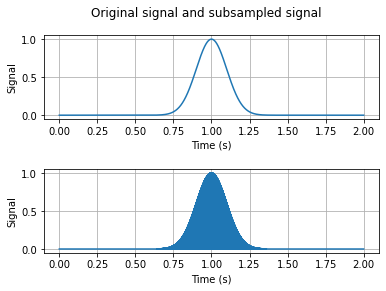

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import warnings

from scipy import signal

class subsample(object):

    def __init__(self, x, T_s, tau):

        self.x = x
        self.T_s = T_s
        self.f_s = np.int(1/T_s)
        self.tau = tau
        self.f_ss = np.int(1/tau)
        self.N = len(x)

    def solve(self):

        step = np.int(self.tau/self.T_s)
        x_s = self.x[0::step]
        x_delta = np.zeros(self.N)
        x_delta[0::step] = x_s

        return x_s, x_delta

if __name__ == '__main__':

  sigma = 0.1
  mu = 1
  f_s = 40000
  f_ss = 4000
  T = 2
  N = T*f_s

  # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('Original signal and subsampled signal' )
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(t, x)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Signal')
  axs[1].plot(t, x_delta)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Signal')


# Problem 2.3 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

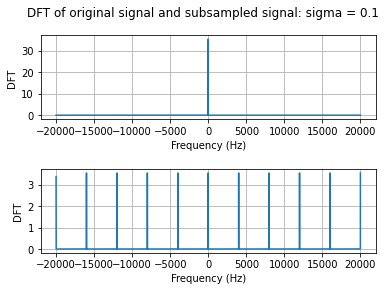

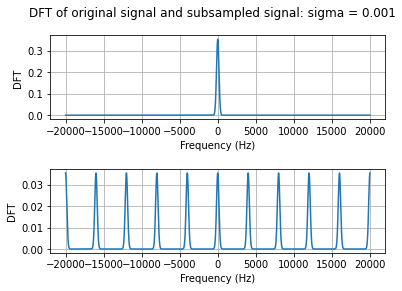

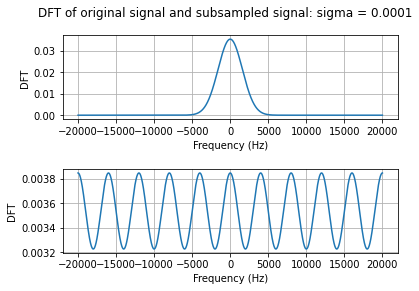

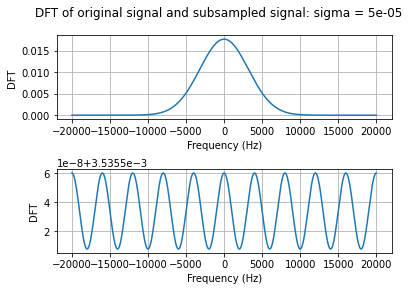

In [25]:
if __name__ == '__main__': 
  sigma = 0.1
  mu = 1
  f_s = 40000
  f_ss = 4000
  T = 2
  N = T*f_s

  # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('DFT of original signal and subsampled signal: sigma = ' + str(sigma))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(freqs_c, abs(X_c))
  axs[0].set_xlabel('Frequency (Hz)')
  axs[0].set_ylabel('DFT')
  axs[1].plot(freqs_c, abs(X_delta_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')

  sigma = 0.0001 

    # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('DFT of original signal and subsampled signal: sigma = ' + str(sigma))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(freqs_c, abs(X_c))
  axs[0].set_xlabel('Frequency (Hz)')
  axs[0].set_ylabel('DFT')
  axs[1].plot(freqs_c, abs(X_delta_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')

  sigma = 0.00005

    # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('DFT of original signal and subsampled signal: sigma = ' + str(sigma))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(freqs_c, abs(X_c))
  axs[0].set_xlabel('Frequency (Hz)')
  axs[0].set_ylabel('DFT')
  axs[1].plot(freqs_c, abs(X_delta_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')

  

# Problem 2.4 

In [31]:
class subsample_low_pass(object):

    def __init__(self, x, T_s, tau):

        self.x = x
        self.T_s = T_s
        self.f_s = np.int(1/T_s)
        self.tau = tau
        self.f_ss = np.int(1/tau)
        self.N = len(x)

    def solve(self):

        fmax = self.f_ss/2
        DFT = dft(self.x, self.f_s)
        [_, _, f_c, X_c] = DFT.solve()
        index_min  = np.min(np.where(f_c >= -fmax)[0])
        index_max = np.max(np.where(f_c <= fmax)[0])
        X_band = np.zeros(self.N)
        X_band[index_min:index_max] = X_c[index_min:index_max]
        X_band = np.roll(X_band, np.int(np.floor(self.N/2+1)))
        iDFT = idft(X_band, self.f_s, self.N)
        x_band, t = iDFT.solve_ifft()

        step = np.int(self.tau/self.T_s)
        x_s = x_band[0::step]
        x_delta = np.zeros(self.N)
        x_delta[0::step] = x_s

        return x_s, x_delta

# Problem 2.5 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecate

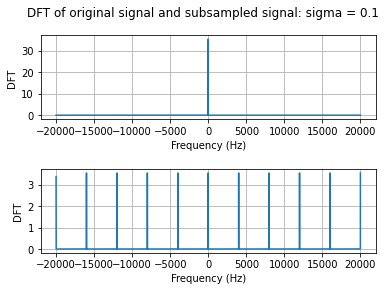

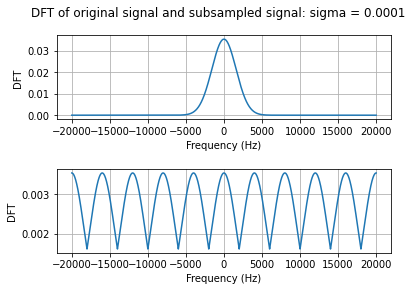

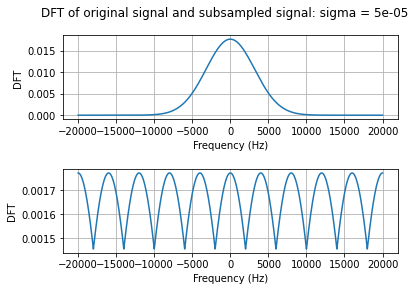

In [33]:
if __name__ == '__main__': 
  sigma = 0.1
  mu = 1
  f_s = 40000
  f_ss = 4000
  T = 2
  N = T*f_s

  # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample_low_pass(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('DFT of original signal and subsampled signal: sigma = ' + str(sigma))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(freqs_c, abs(X_c))
  axs[0].set_xlabel('Frequency (Hz)')
  axs[0].set_ylabel('DFT')
  axs[1].plot(freqs_c, abs(X_delta_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')

  sigma = 0.0001 

    # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample_low_pass(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('DFT of original signal and subsampled signal: sigma = ' + str(sigma))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(freqs_c, abs(X_c))
  axs[0].set_xlabel('Frequency (Hz)')
  axs[0].set_ylabel('DFT')
  axs[1].plot(freqs_c, abs(X_delta_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')

  sigma = 0.00005

    # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample_low_pass(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('DFT of original signal and subsampled signal: sigma = ' + str(sigma))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(freqs_c, abs(X_c))
  axs[0].set_xlabel('Frequency (Hz)')
  axs[0].set_ylabel('DFT')
  axs[1].plot(freqs_c, abs(X_delta_c))
  axs[1].set_xlabel('Frequency (Hz)')
  axs[1].set_ylabel('DFT')


# Problem 2.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

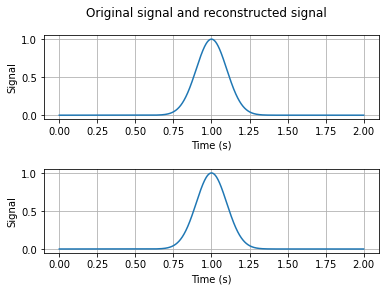

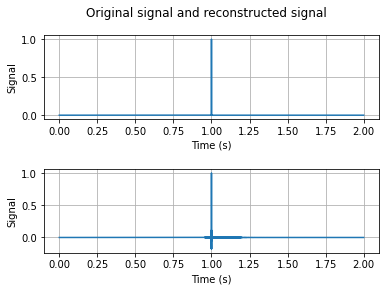

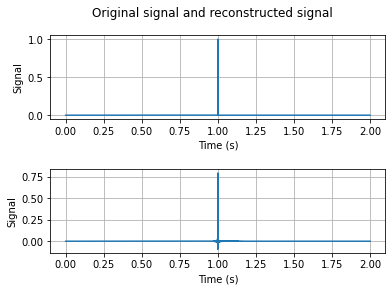

In [39]:
class reconstruct():
    
    def __init__(self, x_s, T_s, tau):
        
        self.x_s = x_s
        self.T_s = T_s
        self.f_s = np.int(1/T_s)
        self.tau = tau
        self.nu = np.int(1/tau)
        self.N = len(x_s)*np.int(tau/T_s)
        
    def solve(self):
        
        x = np.zeros(self.N)
        step = np.int(self.tau/self.T_s)
        x[0::step] = self.x_s
        DFT_obj = dft(x,self.f_s)
        [_,_,f_c,X_c] = DFT_obj.solve()
        fmax = self.nu/2
        index_min  = np.min(np.where(f_c >= -fmax)[0])
        index_max = np.max(np.where(f_c <= fmax)[0])
        X_band = np.zeros(self.N)
        X_band[index_min:index_max] = step*X_c[index_min:index_max]
        X_band = np.roll(X_band, np.int(np.floor(self.N/2+1)))
        iDFT = idft(X_band, self.f_s, self.N)
        x_band, t = iDFT.solve_ifft()
        
        return x_band

if __name__ == '__main__': 

  # Gaussian Pulse (from 2.1) WITHOUT ALIASING
  sigma = 0.1
  mu = 1
  f_s = 40000
  f_ss = 4000
  T = 2
  N = T*f_s

  # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  reconstruct_obj = reconstruct(x_s, 1/f_s, 1/f_ss)
  x_r = reconstruct_obj.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('Original signal and reconstructed signal' )
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(t, x)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Signal')
  axs[1].plot(t, x_r)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Signal')

  # Gaussian Pulse (from 2.2) WITH ALIASING WITHOUT PREFILTERING 
  sigma = 0.0001
  mu = 1
  f_s = 40000
  f_ss = 4000
  T = 2
  N = T*f_s

  # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  reconstruct_obj = reconstruct(x_s, 1/f_s, 1/f_ss)
  x_r = reconstruct_obj.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('Original signal and reconstructed signal' )
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(t, x)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Signal')
  axs[1].plot(t, x_r)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Signal')

  # Gaussian Pulse (from 2.4) WITH ALIASING WITHOUT PREFILTERING 
  sigma = 0.0001
  mu = 1
  f_s = 40000
  f_ss = 4000
  T = 2
  N = T*f_s

  # Create Gaussian pulse
  gaussian_obj = Gaussian(T, mu, sigma, f_s)
  x = gaussian_obj.sig
  t = gaussian_obj.t

  # Subsample
  subsample_obj = subsample_low_pass(x, 1/f_s, 1/f_ss)
  x_s, x_delta = subsample_obj.solve()

  # DFT of Original
  DFT_x = dft(x, f_s)
  [_, _, freqs_c, X_c] = DFT_x.solve()

  # DFT of Subsample
  DFT_x_delta = dft(x_delta, f_s)
  [_, _, _, X_delta_c] = DFT_x_delta.solve()

  reconstruct_obj = reconstruct(x_s, 1/f_s, 1/f_ss)
  x_r = reconstruct_obj.solve()

  # Plot
  fig, axs = plt.subplots(2)
  axs[0].grid()
  axs[1].grid()
  fig.suptitle('Original signal and reconstructed signal' )
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
  axs[0].plot(t, x)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Signal')
  axs[1].plot(t, x_r)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Signal')
